In [14]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/predictionscsv/probs.csv
/kaggle/input/predictionscsv/predictions.csv
/kaggle/input/mobile-phone-activity/mi-to-provinces-2013-11-02.csv
/kaggle/input/mobile-phone-activity/mi-to-provinces-2013-11-03.csv
/kaggle/input/mobile-phone-activity/mi-to-provinces-2013-11-05.csv
/kaggle/input/mobile-phone-activity/Italian_provinces.geojson
/kaggle/input/mobile-phone-activity/ISTAT_census_variables_2011.csv
/kaggle/input/mobile-phone-activity/mi-to-provinces-2013-11-01.csv
/kaggle/input/mobile-phone-activity/sms-call-internet-mi-2013-11-03.csv
/kaggle/input/mobile-phone-activity/sms-call-internet-mi-2013-11-06.csv
/kaggle/input/mobile-phone-activity/milano-grid.geojson
/kaggle/input/mobile-phone-activity/sms-call-internet-mi-2013-11-01.csv
/kaggle/input/mobile-phone-activity/sms-call-internet-mi-2013-11-04.csv
/kaggle/input/mobile-phone-activity/sms-call-internet-mi-2013-11-05.csv
/kaggle/input/mobile-phone-activity/sms-call-internet-mi-2013-11-07.csv
/kaggle/input/mobile-phone-act

# Подготовка, чтения данных из датасета

In [15]:
df = pd.DataFrame({})
for i in range(1,8):
    df_tmp = pd.read_csv('/kaggle/input/mobile-phone-activity/sms-call-internet-mi-2013-11-0{}.csv'.format(i), parse_dates=['datetime'])
    df = df.append(df_tmp)
df.fillna(0.0)


,datetime,CellID,countrycode,smsin,smsout,callin,callout,internet
0,2013-11-01 00:00:00,1,0,0.3521,0.0000,0.0000,0.0273,0.0000
1,2013-11-01 00:00:00,1,33,0.0000,0.0000,0.0000,0.0000,0.0261
2,2013-11-01 00:00:00,1,39,1.7322,1.1047,0.5919,0.4020,57.7729
3,2013-11-01 00:00:00,2,0,0.3581,0.0000,0.0000,0.0273,0.0000
4,2013-11-01 00:00:00,2,33,0.0000,0.0000,0.0000,0.0000,0.0274
...,...,...,...,...,...,...,...,...
2407379,2013-11-07 23:00:00,10000,7,0.0000,0.0000,0.0000,0.0000,0.0872
2407380,2013-11-07 23:00:00,10000,39,4.3872,2.9300,2.6409,0.6442,135.6360
2407381,2013-11-07 23:00:00,10000,40,0.0860,0.0000,0.0000,0.0000,0.0000
2407382,2013-11-07 23:00:00,10000,216,0.0095,0.0000,0.0000,0.0000,0.0000


In [16]:
df['sms'] = df['smsin'] + df['smsout']
df['call'] = df['callin'] + df['callout']
df.drop(['smsin', 'smsout', 'callin', 'callout'], axis = 1)

,datetime,CellID,countrycode,internet,sms,call
0,2013-11-01 00:00:00,1,0,NaN,NaN,NaN
1,2013-11-01 00:00:00,1,33,0.0261,NaN,NaN
2,2013-11-01 00:00:00,1,39,57.7729,2.8369,0.9939
3,2013-11-01 00:00:00,2,0,NaN,NaN,NaN
4,2013-11-01 00:00:00,2,33,0.0274,NaN,NaN
...,...,...,...,...,...,...
2407379,2013-11-07 23:00:00,10000,7,0.0872,NaN,NaN
2407380,2013-11-07 23:00:00,10000,39,135.6360,7.3172,3.2851
2407381,2013-11-07 23:00:00,10000,40,NaN,NaN,NaN
2407382,2013-11-07 23:00:00,10000,216,NaN,NaN,NaN


In [17]:
df_internet = df[['datetime', 'CellID', 'internet', 'call', 'sms']].groupby(['datetime', 'CellID'], as_index=False).sum()
df_internet['hour'] = df_internet.datetime.dt.hour+24*(df_internet.datetime.dt.day-1)
df_internet = df_internet.set_index(['hour']).sort_index()

In [18]:
df_internet

,datetime,CellID,internet,call,sms
hour,,,,,
0,2013-11-01 00:00:00,1,57.7990,0.9939,2.8369
0,2013-11-01 00:00:00,2,57.9149,1.0129,2.8214
0,2013-11-01 00:00:00,3,58.0382,1.0331,2.8049
0,2013-11-01 00:00:00,4,57.4634,0.9390,2.8817
0,2013-11-01 00:00:00,5,52.1714,0.8613,2.5969
...,...,...,...,...,...
167,2013-11-07 23:00:00,9996,191.2033,3.9516,13.8368
167,2013-11-07 23:00:00,9997,212.2059,4.3320,12.6605
167,2013-11-07 23:00:00,9998,207.8873,4.2495,12.8810


In [19]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import geopandas as gpd
import geojson
import matplotlib.cm as cmx
import seaborn as sns
sns.set_theme()
#import matplotlib as mpl
from descartes import PolygonPatch

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


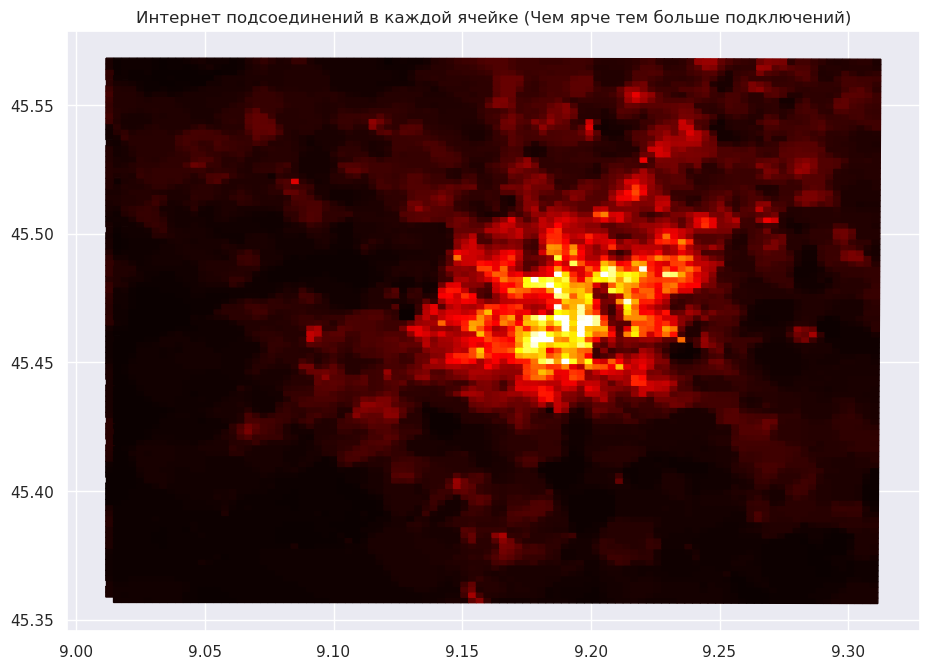

In [20]:
num = 10001
arr_cellID = np.zeros(num)
arr_mean = np.zeros(num)
for i in range(1,num):
    internet_usage = df_internet[df_internet.CellID==i]['internet']
    xdata = df_internet[df_internet.CellID==i]['internet'].index
    mean = np.mean(internet_usage)
    arr_cellID[i]=i
    arr_mean[i]=mean

fig = plt.figure() 
ax = fig.gca() 

with open("/kaggle/input/mobile-phone-activity/milano-grid.geojson") as json_file:
    json_data = geojson.load(json_file)

coordlist = json_data.features[1]['geometry']['coordinates'][0]

jet = cm = plt.get_cmap('hot') 
#cNorm  = colors.Normalize(vmin=0, vmax=np.max(arr_mean))
cNorm  = colors.Normalize(vmin=0, vmax=5000)
#cNorm  = colors.Normalize(vmin=0, vmax=np.max(arr_mean_log))
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
#print(scalarMap.get_clim())

for i in range(1,10000):
    poly = json_data.features[i]['geometry']
    colorVal = scalarMap.to_rgba(arr_mean[i])
    ax.add_patch(PolygonPatch(poly, fc=colorVal, ec=colorVal, alpha=1, zorder=1 ))
ax.axis('scaled')

fig.set_size_inches(11,11)
plt.title("Интернет подсоединений в каждой ячейке (Чем ярче тем больше подключений)")
plt.show()

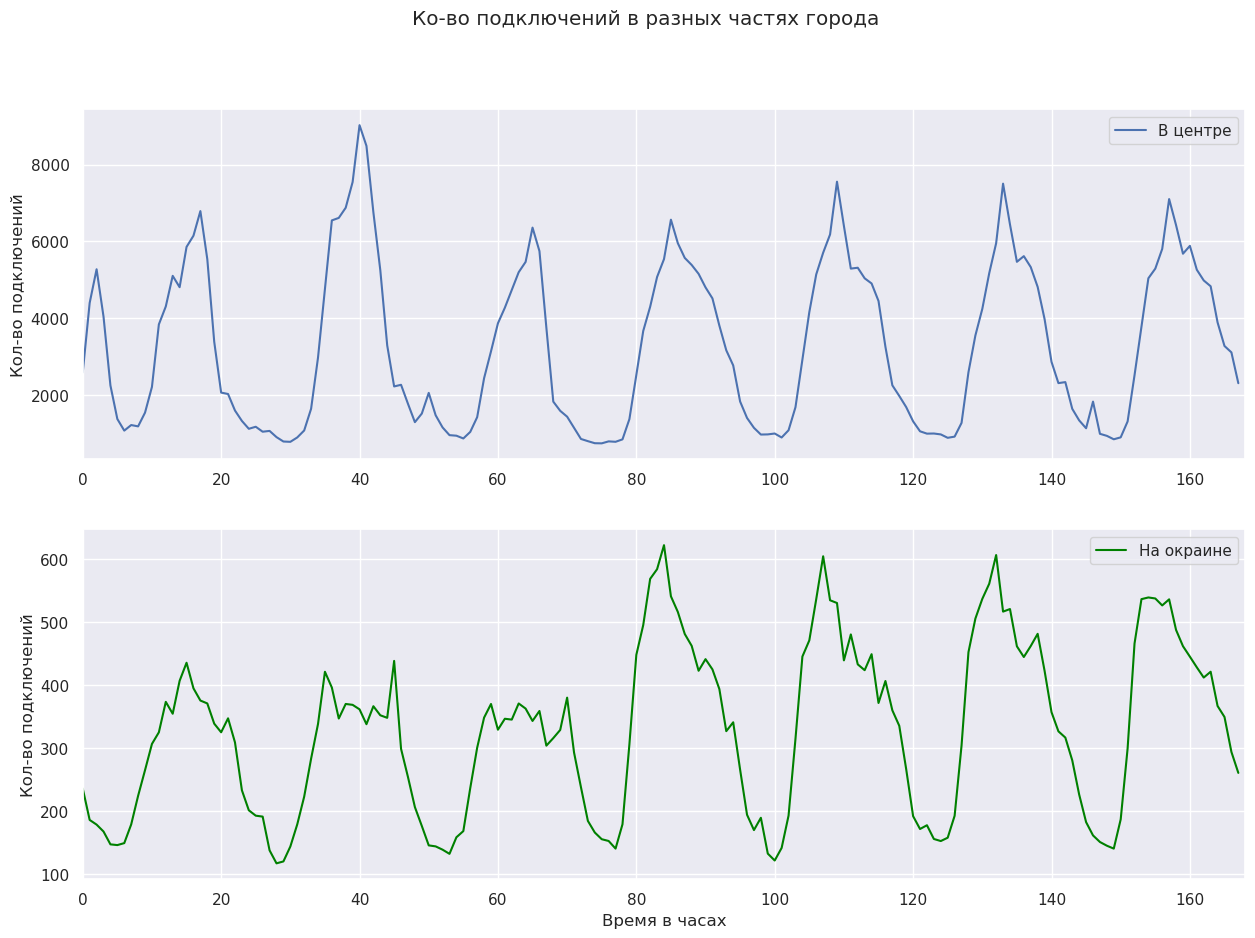

In [104]:
f, axs = plt.subplots(2, figsize=(15, 10))
f.suptitle("Ко-во подключений в разных частях города")
axs[0].plot(df_internet[df_internet.CellID == 5060]['internet'].index, df_internet[df_internet.CellID==5060]['internet'], label = 'В центре')
axs[1].plot(df_internet[df_internet.CellID == 1050]['internet'].index, df_internet[df_internet.CellID==1050]['internet'], color = 'Green',label = 'На окраине')
axs[0].set( ylabel = 'Кол-во подключений')
axs[0].legend(loc = "upper right")
axs[1].set(xlabel = 'Время в часах', ylabel = 'Кол-во подключений')
axs[1].legend(loc = "upper right")
#plt.xlabel("Время в часах")
#plt.ylabel("Количество")
axs[0].set_xlim([0,168])
axs[1].set_xlim([0,168])
#plt.ylim([0,10000])
#plt.legend()
plt.show()



# Наглядно показываем зависимость между всеми тремя видами траффика, поэтому было выбрано исследовать интернет

Text(0, 0.5, 'internet')

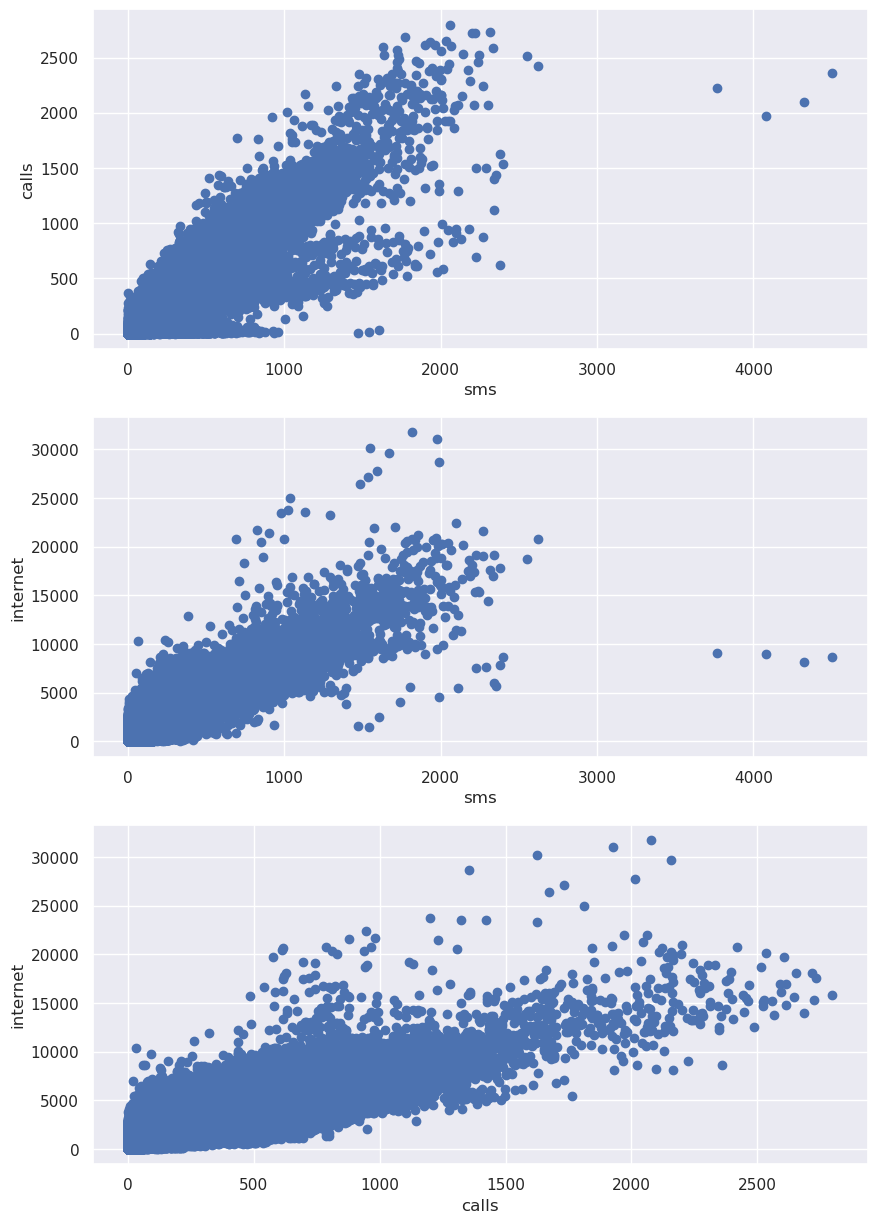

In [103]:
f, axs = plt.subplots(3, figsize = (10, 15))
axs[0].scatter(df["sms"], df["call"])
axs[0].set_xlabel('sms')
axs[0].set_ylabel('calls')
axs[1].scatter(df["sms"], df["internet"])
axs[1].set_xlabel('sms')
axs[1].set_ylabel('internet')
axs[2].scatter(df["call"], df["internet"])
axs[2].set_xlabel('calls')
axs[2].set_ylabel('internet')

# Прогнозируем траффик

In [23]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 35.7 MB/s eta 0:00:0000:01
Note: you may need to restart the kernel to use updated packages.


In [24]:
import pmdarima as pm

In [25]:
arr_4060 = df_internet[df_internet.CellID == 4060]["internet"]
model = pm.auto_arima(arr_4060, m=24, enforce_stationarity=False)

In [26]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  168
Model:             SARIMAX(1, 1, 1)x(1, 0, 1, 24)   Log Likelihood               -1168.349
Date:                            Sun, 16 Apr 2023   AIC                           2346.697
Time:                                    08:44:26   BIC                           2362.287
Sample:                                         0   HQIC                          2353.025
                                            - 168                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8906      0.047     18.753      0.000       0.797       0.984
ma.L1         -0.9837      0.023    -42.574      0.000      -1.029      -0.938
ar.S.L24       0.7373      0.195      3.774      0.000       0.354       1.120
ma.S.L24      -0.4163      0.257     -1.617      0.106      -0.921       0.088
sigma2      6.744e+04   5477.943     12.311      0.000    5.67e+04    7.82e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.90   Jarque-Bera (JB):                27.92
Prob(Q):                              0.34   Prob(JB):                         0.00
Heteroskedasticity (H):               4.26   Skew:                             0.29
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

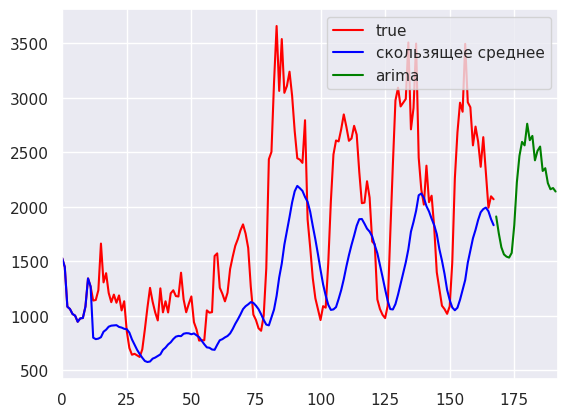

In [105]:
arr_4060 = df_internet[df_internet.CellID == 4060]["internet"]
plt.plot(arr_4060, color = "red", label ='true')
arr_ = [el for el in arr_4060]
k = 12
for i in range(k, 168):
    #arr_[i] = np.average(arr_5060[i-k:i-1])
    arr_[i] = 0
    lam_0 = 0.95
    lam = 1
    for j in range(i-1, i-k, -1):
        arr_[i]+=lam*arr_4060[j]
        lam*=lam_0
    arr_[i]/=k
plt.plot(arr_, color = "blue", label='скользящее среднее')
plt.xlim([0, 168+24])
model.fit(arr_4060)
pred = model.predict(n_periods=24)
plt.plot(pred, color = 'green', label='arima')
plt.legend()
plt.show()


In [ ]:
pred = [df_internet[df_internet.CellID == i]["internet"] for i in range(10000)]

In [ ]:
parr = [] # этот код выполняется примерно 3 часа, поэтому все прогнозы были сохранены в файл после первого прогона
for i in range(10000):
    if (i % 100 == 0):
        print(i / 100, '%', sep='')
    try:
        model.fit(pred[i])
        parr.append(model.predict(n_periods = 24))
    except KeyboardInterrupt:
        sys.exit()
    except:
        parr.append([])
        continue


# Здесь мы нормируем значения траффика, чтобы он был от 0 до 1, а также подсчитываем вероятности пиков траффика для последующей кластеризации

In [ ]:
def prepare_for_clustering(parr):
    for i in range(10000):
        parr[i] = np.array(parr[i])
        if (len(parr[i]) == 0):
            parr[i] = np.array(df_internet[df_internet.CellID == i]["internet"]) 
    mx = 0
    for i in range(10000):
        for j in range(len(parr[i])):
            #print(el)
            try:
                mx = max(mx, parr[i][j])
            except:
                pass
                #print(i)
    parr /= mx
    return parr

In [ ]:
def get_picks_probs(predictions):
    picks = [[] for _ in range(10000)]
    for rid in range(1, 10000):
        #print(rid)
        for i in range(1, 23):
            if predictions[rid][i] > predictions[rid][i+1] and predictions[rid][i] > predictions[rid][i-1]:
                picks[rid].append(i)
    probs = [0]*10000
    for i in range(10000): 
        probs[i] = len(picks[i])/24
    return probs


In [ ]:
predictions = prepare_for_clustering(np.array(parr))
probs = get_picks_probs(predictions)

In [ ]:
with open('probs.csv', 'w') as f:
    for i in range(10000):
        print(i, probs[i], file=f)
    

In [ ]:
with open('predictions.csv', 'w') as f:
    for i in range(10000):
        print(i, predictions[i], file=f)
    

In [29]:
df_probs = pd.read_csv('/kaggle/input/predictionscsv/probs.csv', sep=' ', names = ['rid', 'prob'])

df_predictions = pd.read_csv('/kaggle/input/predictionscsv/predictions.csv', sep = ' ', names = ['rid', 'traffic'])

In [58]:
probs = np.array(df_probs['prob'])
predictions = [[] for _ in range(10000)]
for i in range(np.shape(df_predictions)[0]):
    predictions[int(df_predictions.loc[i]['rid'])].append(df_predictions.loc[i]['traffic'])
    

# Функции для кластеризации

In [61]:
def shanon_entropy(cluster): # в кластере хранятся индексы RRH
    res = 0
    for rid in cluster:
        if (probs[int(rid)]) != 0:
            res -= probs[int(rid)]*np.log2((probs[int(rid)]))
    return res

In [62]:
def capacity_utility(cluster, t1, t2, b):
    mean_f = 0
    for rid in cluster:
        mean_f += sum(predictions[int(rid)][t1:t2])
    mean_f /= len(cluster)
    if mean_f == 0:
        return 0
    return np.power(mean_f / b, -np.log10(mean_f/b))

In [63]:
def metric(cluster, t1, t2, b = 8):
    return shanon_entropy(cluster)*capacity_utility(cluster, t1, t2, b)

In [64]:
def w_calc(tau = 65): #вычисление весов в матрице смежности
    n = 10000
    w = np.zeros((n, n))
    for rid_1 in range(n):
        for rid_2 in range(rid_1+1):
            if ((rid_1 // 100 - rid_2 // 100)**2 + (rid_1 % 100 - rid_2 % 100)**2 <= tau**2):
                w[rid_1][rid_2] = metric([rid_2, rid_1], 0, 24)
            else:
                w[rid_1][rid_2] = 0
            w[rid_2][rid_1] = w[rid_1][rid_2]
    return w


In [65]:
def connectivity(rid, cluster):
    res = 0
    for rrh in cluster:
        res += w[rrh][rid]
    return res

In [66]:
def value(rid, cluster, tau = 65):
    mx_dist = 0
    for rrh in cluster:
        mx_dist = max(mx_dist,((rrh // 100 - rid // 100)**2 + (rrh % 100 - rid % 100)**2))
    if (mx_dist == 0):
        return connectivity(rid, cluster)*np.log2(tau / mx_dist)
    return 0

In [67]:
def is_adj(rid, cluster, tau = 65): #проверка на расстояния в кластере, они должны быть меньше заданного tau
    for rrh in cluster:
        if ((rrh // 100 - rid // 100)**2 + (rrh % 100 - rid % 100)**2) >= tau**2:
            return 0
    return 1

In [68]:
def DCCA(n = 10000, max_iter = 500): #функция для кластеризации 
    clusters = [[i] for i in range(n)] # first init of all clusters
    #print(np.shape(clusters))
    rrhs = [i for i in range(n)]
    is_done = 1
    for _ in range(max_iter):
        #lets populate random list of rrh's
        rand_size = 10
        rand_list = np.random.randint(n, size = rand_size)
        for rrh in rand_list:
            #print(rrhs[rrh])
            clusters[rrhs[rrh]].remove(rrh)
            adj_clusters = []
            for ind in range(n-1):
                #print(ind)
                if (connectivity(rrh, clusters[ind]) > 0 and is_adj(rrh, clusters[ind])):
                    adj_clusters.append([ind, value(rrh, clusters[ind])])
            #print(adj_clusters)
            if (len(adj_clusters)):
                max_con = adj_clusters[0][1]
                max_con_ind = adj_clusters[0][0]
                for ind in range(len(adj_clusters)):
                    if max_con < adj_clusters[ind][1]:
                        max_con = adj_clusters[ind][1]
                        max_con_ind = adj_clusters[ind][0]
                if rrhs[rrh] != max_con_ind:
                    is_done = 0
                clusters[max_con_ind].append(rrh)
                rrhs[rrh] = max_con_ind
            else:
                clusters[rrhs[rrh]].append(rrh)
            if is_done:
                break
                
    return clusters, rrhs
        
            
        
    
    
    

# Считаем веса и кластеризуем

In [69]:
w = w_calc() #подсчет весов

In [70]:
print(w)

[[0.00000000e+00 1.37315157e-07 1.40022576e-07 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.37315157e-07 7.50842669e-06 7.57338067e-06 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.40022576e-07 7.57338067e-06 7.63874548e-06 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 2.07307781e-03
  2.03549729e-03 1.07338984e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 2.03549729e-03
  1.99833931e-03 1.04871960e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.07338984e-03
  1.04871960e-03 4.57482958e-04]]


In [71]:
clusters, rrhs = DCCA(10000, 18000) # кластеризация

In [72]:
import seaborn as sns

In [73]:
arr = list(map(len, clusters))
print(sorted(arr))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [74]:
cl = []
for el in sorted(clusters, reverse=True, key=len):
    if len(el) > 40:
        cl.append(el)

In [75]:
print(len(cl))

7


In [76]:
rrs = [-1]*10000
for i in range(10000):
    for j in range(len(cl)):
        if i in cl[j]:
            rrs[i] = j
            

In [ ]:
import numpy as np
a = np.array([[2, 2], [3,4]])

In [77]:
rrhs_2d = np.reshape(rrhs, (100, 100))
rrs_2d = np.reshape(rrs, (100, 100))
#print(rrhs_2d)

[]

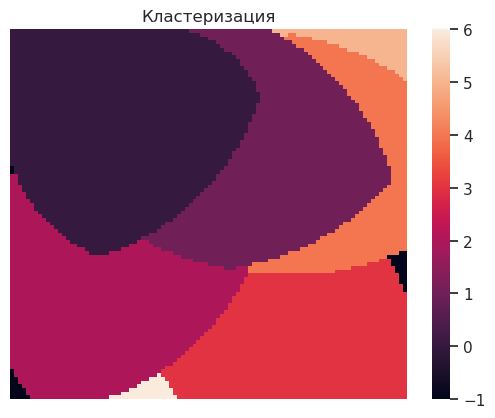

In [101]:
s = sns.heatmap(data = rrs_2d) 
s.set_title('Кластеризация')
s.set_xticks([])
s.set_yticks([])

# Сравним общую емкость при C-RAN структуре и при обычной



In [99]:

cap_utility = 8*len(cl)
print(f'Общий объем в нашем случае: {cap_utility}')
cap_utility_default = 0
for i in range(10000):
    if (len(predictions[i]) == 0):
        continue
    if (max(predictions[i]) > 1):
        print(i)
        break
    cap_utility_default += max(predictions[i])
print(f'Общий объем в обычной структуре: {cap_utility_default}')
print(f'Таким образом мы уменьшили затраты в {cap_utility_default / cap_utility} раз')

Общий объем в нашем случае: 56
Общий объем в обычной структуре: 269.7420854645143
Таким образом мы уменьшили затраты в 4.816822954723469 раз
